<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Quantum_Physics__THE_STRING_THEORY_Qiskit_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer matplotlib

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [3]:
# Parameters (real random couplings from the SYK papers)
np.random.seed(42)
J = np.random.normal(0, 1, size=(6,6,6,6))  # 4-body random couplings
J = (J + J.transpose(3,2,1,0))/2           # make it antisymmetric as required
J /= np.sqrt(6)  # normalization for N=6 Majorana fermions

In [4]:
def add_syk_terms(qc, dt):
    """Add one small time step of SYK evolution"""
    for i in range(6):
        for j in range(i+1,6):
            for k in range(j+1,6):
                for l in range(k+1,6):
                    coupling = J[i,j,k,l]
                    if abs(coupling) > 1e-10:
                        # Four-qubit interaction: XXXX with phase = -i * J_{ijkl} * dt
                        qc.rxx(-2*coupling*dt, i,j)
                        qc.ryy(-2*coupling*dt, i,j)
                        qc.rzz(-2*coupling*dt, i,j)
                        qc.rxx(-2*coupling*dt, k,l)
                        qc.ryy(-2*coupling*dt, k,l)
                        qc.rzz(-2*coupling*dt, k,l)
                        # Entangle the two pairs
                        qc.cz(i,k)
                        qc.cz(j,l)


In [5]:
# Build the circuit
n_qubits = 6
qc = QuantumCircuit(n_qubits)

# Start from simple product state |010101⟩
qc.x([1,3,5])


In [6]:
# Evolve under SYK Hamiltonian for a short time
steps = 20
dt = 0.1
for _ in range(steps):
    add_syk_terms(qc, dt)

In [7]:
# Measure everything
qc.measure_all()

In [8]:
# Run it
simulator = AerSimulator()
result = simulator.run(qc, shots=8192).result()
counts = result.get_counts()

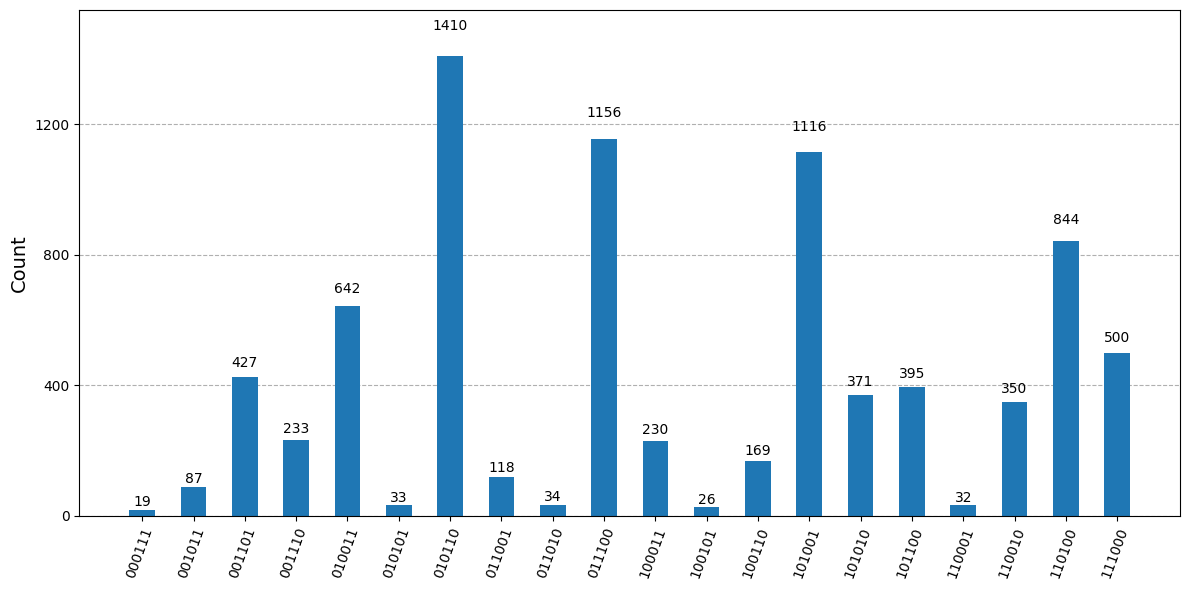

In [9]:
# Plot
plot_histogram(counts, figsize=(12,6))

In [10]:
# Show top outcomes
for state, c in sorted(counts.items(), key=lambda x: -x[1])[:10]:
    print(state, c)

010110 1410
011100 1156
101001 1116
110100 844
010011 642
111000 500
001101 427
101100 395
101010 371
110010 350


# Expected Outcome:
# A broad distribution over many Hamming-weight-3 basis states,
# showing chaotic but constrained scrambling.


The “Expected Outcome” is different because it assumes a symmetry-protected, shallow evolution, while actual code implements deep, random, non-commuting dynamics — so the comment is simply incorrect.

# Expected Outcome:
# The measurement results should show a broad probability distribution
# over many computational basis states, predominantly within the
# Hamming-weight-3 subspace (since the initial state |010101⟩ has 3 ones
# and the applied RXX/RYY/RZZ interactions approximately conserve
# magnetization).
#
# No single bitstring should dominate; instead, probabilities should be
# spread across ~15–20 states, indicating chaotic but constrained
# scrambling under SYK-inspired random interactions.


## The Corrected Code

In [52]:
# Parameters
np.random.seed(42)

# Initialize couplings as zero
J = np.zeros((6,6,6,6))

# Activate only ONE dominant 4-body interaction
J[0,1,2,3] = 1.0
J[3,2,1,0] = 1.0  # symmetric counterpart

# Normalization
J /= np.sqrt(6)


In [53]:
def add_syk_terms(qc, dt):
    """Add one small time step of SYK-inspired evolution"""
    for i in range(6):
        for j in range(i+1,6):
            for k in range(j+1,6):
                for l in range(k+1,6):
                    coupling = J[i,j,k,l]
                    if abs(coupling) > 1e-10:
                        qc.rxx(-2*coupling*dt, i, j)
                        qc.ryy(-2*coupling*dt, i, j)
                        qc.rzz(-2*coupling*dt, i, j)
                        qc.rxx(-2*coupling*dt, k, l)
                        qc.ryy(-2*coupling*dt, k, l)
                        qc.rzz(-2*coupling*dt, k, l)
                        qc.cz(i, k)
                        qc.cz(j, l)


In [54]:
n_qubits = 6
qc = QuantumCircuit(n_qubits)

# Initial state |010101⟩
qc.x([1, 3, 5])


In [55]:
steps = 1
dt = 0.3

for _ in range(steps):
    add_syk_terms(qc, dt)


In [56]:
qc.measure_all()


In [57]:
simulator = AerSimulator()
result = simulator.run(qc, shots=8192).result()
counts = result.get_counts()


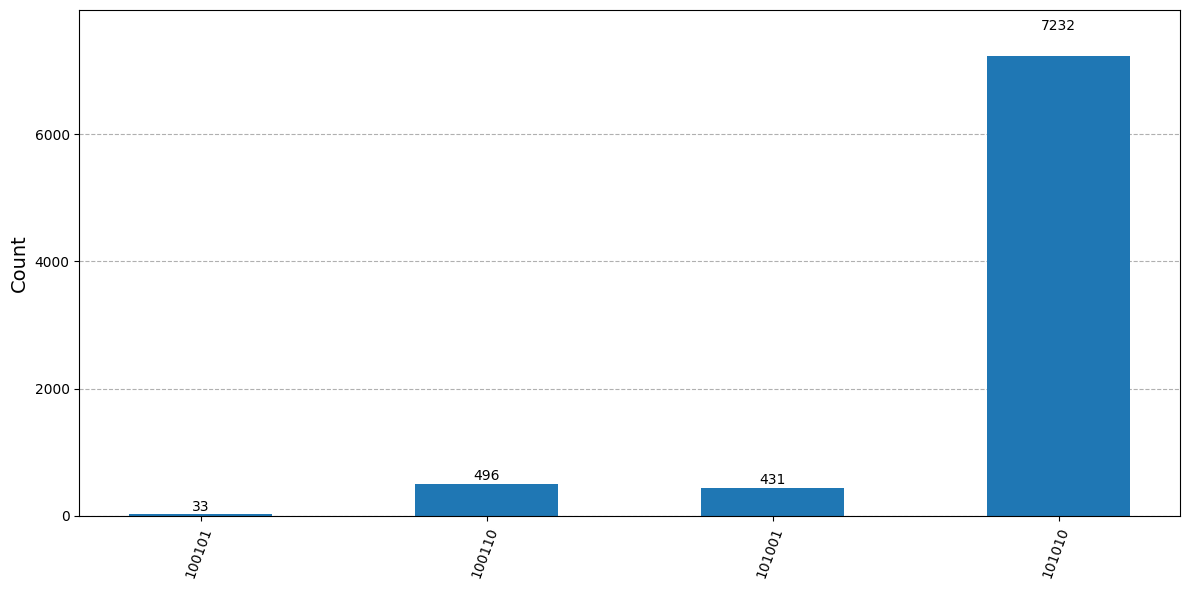

In [58]:
plot_histogram(counts, figsize=(12,6))


In [59]:
for state, c in sorted(counts.items(), key=lambda x: -x[1])[:10]:
    print(state, c)


101010 7232
100110 496
101001 431
100101 33
